<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-280 Estadística Computacional I-2020 </h1>

<H3 align='center'> Tema 3 - Variables Aleatorias Discretas  </H3>
<hr style="height:2px;border:none"/>

In [544]:
from random import seed, random
from math import ceil, floor
import pandas as pd
import numpy as np
from IPython.display import display, HTML, display_html
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#sns.set(style="whitegrid", palette="muted")
sns.set(style="darkgrid", palette="muted")
sns.set_context("notebook")

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [545]:
def expected_value(values, f):
    return np.dot(values, f)

def variance(values, f):
    return expected_value(values**2, f) - expected_value(values, f)**2

In [546]:
def random_array(R,n):
    return np.array([ceil(random()*R) for _ in range(n)])

def random_play(yubis, N):
    return random_array(yubis, N), random_array(yubis, N)

In [547]:
def morra(player1, player2):
    play1, bet1 = player1
    play2, bet2 = player2
    scores = []
    for p1, b1, p2, b2 in zip(play1, bet1, play2, bet2):
        yubis = p1+p2
        if(b1 == p2 and b2 != p1): scores.append(yubis)
        else: scores.append(0)
    return np.array(scores)
    

In [548]:
def pplot(result, N):
    ax = sns.countplot(result, order=values)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylim(0,100)
    ax.set_ylim(0,N)

    ax.set_xlabel("Recorrido $X$")
    ax.set_ylabel("Cantidad")

    ax.set_title("Distribucion de probabilidad para $X$")

    ax2.set_ylabel("Frecuencia %")

    ax.yaxis.set_major_locator(ticker.LinearLocator(11))

    ax2.grid(None)

    ax.plot()

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b9/Tipi_Napoletani_-_Il_Giuoco_della_Morra_%28Boys_playing_%22Morra%22%29_-_Old_postcard.jpg" alt="drawing" width="400"/>

# Morra: 2 Dedos
---


,$fr$
0,0.75011
1,0.00000
2,0.06237
3,0.12469
4,0.06283
,
$E[X]$,0.750130
$V[X]$,1.814275


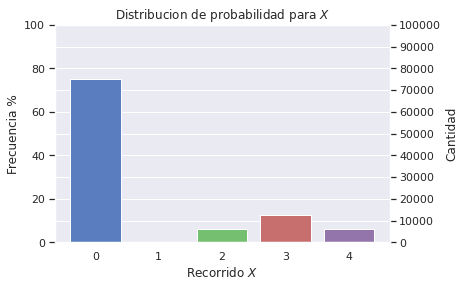

In [568]:
seed()

yubis = 2
N = 100000


player1 = random_play(yubis, N)
player2 = random_play(yubis, N)

result = morra(player1, player2)
fr = np.bincount(result, minlength=yubis*2+1)/N
values = np.array(range(yubis*2+1))

df_fr = pd.DataFrame(fr, columns=["$fr$"])
df_info = pd.DataFrame([expected_value(values, fr),variance(values, fr)], ["$E[X]$", "$V[X]$"], columns=[""])

display_side_by_side(df_fr, df_info)
pplot(result, N)

# Morra: 10 Dedos
---

,$fr$
0,0.9057
1,0.0000
2,0.0007
3,0.0019
4,0.0024
5,0.0037
6,0.0059
7,0.0064
8,0.0068
9,0.0066


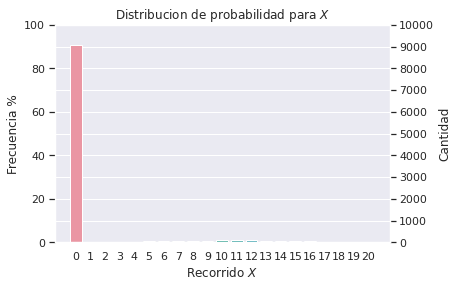

In [571]:
seed()

yubis = 10
N = 10000


player1 = random_play(yubis, N)
player2 = random_play(yubis, N)

result = morra(player1, player2)
fr = np.bincount(result, minlength=yubis*2+1)/N
values = np.array(range(yubis*2+1))

df_fr = pd.DataFrame(fr, columns=["$fr$"])
df_info = pd.DataFrame([expected_value(values, fr),variance(values, fr)], ["$E[X]$", "$V[X]$"], columns=[""])

display_side_by_side(df_fr, df_info)
pplot(result, N)

# Extra: Mejor estrategia
---

In [551]:
def eq_play(yubis, N):
    arr = random_array(yubis, N)
    return arr, arr

In [552]:
def maxeq_play(yubis, N):
    return np.array([yubis]*N), np.array([yubis]*N)

def maxy_play(yubis, N):
    return np.array([yubis]*N), random_array(yubis, N)

def maxb_play(yubis, N):
    return random_array(yubis, N), np.array([yubis]*N)

In [553]:
def exeq_play(yubis, N):
    return np.array([floor(random()*2)*(yubis-1)+1 for _ in range(N)]), np.array([floor(random()*2)*(yubis-1)+1 for _ in range(N)])

def exy_play(yubis, N):
    return np.array([floor(random()*2)*(yubis-1)+1 for _ in range(N)]), random_array(yubis, N)

def exb_play(yubis, N):
    return random_array(yubis, N), np.array([floor(random()*2)*(yubis-1)+1 for _ in range(N)])

,$fr$
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


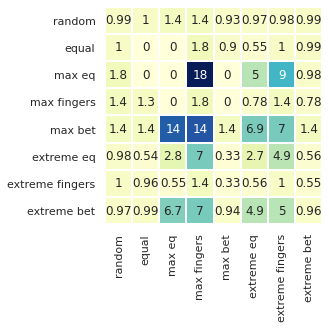

In [563]:
seed()

yubis = 10
N = 100000

values = np.array(range(yubis*2+1))

results = np.zeros(shape=(8,8))

participants = [random_play, eq_play, maxeq_play, maxy_play, maxb_play, exeq_play, exy_play, exb_play]
labels = ["random", "equal", "max eq", "max fingers", "max bet", "extreme eq", "extreme fingers", "extreme bet"]

for i, p1 in enumerate(participants):
    for j, p2 in enumerate(participants):
        player1 = p1(yubis, N)
        player2 = p2(yubis, N)
        f = np.bincount(morra(player1, player2),minlength=yubis*2+1)/N
        
        if((i,j) == (1,1)): display(pd.DataFrame(f, columns=["$fr$"]))

        #print(f1)
        
        results[i,j] = expected_value(values, f)
        

tournament = pd.DataFrame(results, labels, columns=labels)

ax = sns.heatmap(tournament, annot=True, cmap="YlGnBu", linewidths=1, cbar=False, square=True)

ax.xaxis.set_label_position("top")
